<font color='blue'> **01__________________________________ Interactive_Variogram_Calculation** </font> 

In [1]:
import os; import sys ; from pathlib import Path    ; _R = Path("_R")   ; _R.mkdir(exist_ok=True); TA = Path('_R/01__Interactive_Variogram_Calculation_'); TA.mkdir(exist_ok=True)
import numpy as np    ; import pandas as pd ; import matplotlib.pyplot as plt ; import geostatspy.GSLIB as GSLIB   ; import geostatspy.geostats as geostats     ; import geostatspy
from ipywidgets import interactive ; from ipywidgets import widgets ; from ipywidgets import Layout ; from ipywidgets import Label ; from ipywidgets import VBox, HBox
REF1 = Path('E:/15_REPOS/02_Beta-Me/data/Krig/GeostatsPy')  ; plt.rc('axes', axisbelow=True)   ; cmap = plt.cm.inferno 

In [2]:
df = pd.read_csv(REF1/'sample_data_MV_biased.csv')     ;df.to_csv(TA/'sample_data_MV_biased.csv') #; df.tail(2) 
df.describe().transpose().tail(3)                      #df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  ; df_sand.describe().transpose()  # ...

,count,mean,std,min,25%,50%,75%,max
Porosity,368.0,0.127026,0.030642,0.041122,0.103412,0.125842,0.148623,0.210258
Perm,368.0,85.617362,228.362654,0.094627,2.297348,10.377292,50.581288,1991.097723
AI,368.0,4791.736646,974.560569,1981.177309,4110.728374,4713.325533,5464.043562,7561.250336


In [3]:
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity')         # mean = 0.0, standard deviation = 1.0, Gaussian shape 
df['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df, 'Perm')  # ndarray w/ transformed values ... transformation table ...   original values and .... normal score values. 

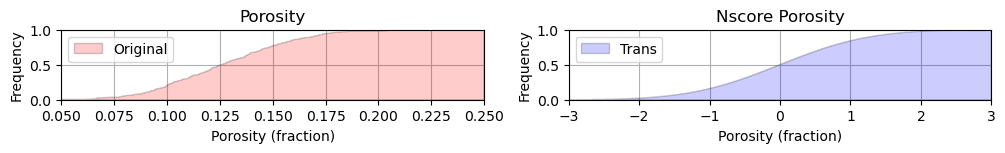

In [4]:
fig = plt.figure(figsize=(12,2)) 
plt.subplot(221) ; plt.hist(df['Porosity'], facecolor='red',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0]) ; plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity') ; plt.legend(loc='upper left') ; plt.grid(True)
plt.subplot(222) ; plt.hist(df['NPor'], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0]) ; plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Nscore Porosity') ; plt.legend(loc='upper left') ; plt.grid(True)

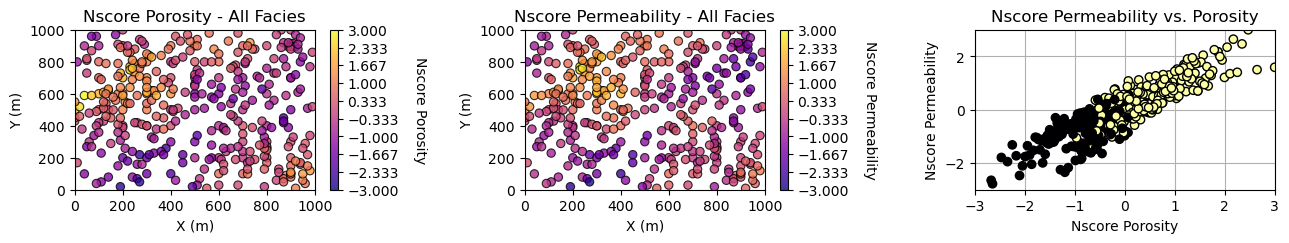

In [5]:
fig = plt.figure(figsize=(6,2))         # suspect a 045 azimuth major direction of continuity  * there may be cycles in the 135 azimuth 
cmap = plt.cm.plasma                                   
plt.subplot(131) ; GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)
plt.subplot(132) ; GSLIB.locmap_st(df,'X','Y','NPerm',0,1000,0,1000,-3,3,'Nscore Permeability - All Facies','X (m)','Y (m)','Nscore Permeability',cmap)
plt.subplot(133) ; facies = df['Facies'].values +0.01 ; plt.scatter(df['NPor'],df['NPerm'],c = facies,edgecolor = 'black',cmap = plt.cm.inferno)
plt.xlabel(r'Nscore Porosity') ; plt.ylabel(r'Nscore Permeability') ; plt.title('Nscore Permeability vs. Porosity') ; plt.xlim([-3,3]) ; plt.ylim([-3,3]) ; plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.5, hspace=0.3) ; plt.show()      

In [6]:
l = widgets.Text(value='  Variogram Calculation Interactive Demonstration, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
lag = widgets.FloatSlider(min = 20, max = 500, value = 100, step = 10, description = 'lag',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update=False) ; lag.style.handle_color = 'gray'
lag_tol = widgets.FloatSlider(min = 1, max = 500, value = 50, step = 10, description = 'lag tolerance',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update=False) ; lag_tol.style.handle_color = 'gray'
nlag = widgets.IntSlider(min = 1, max = 100, value = 10, step = 1, description = 'number of lags',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update=False) ; nlag.style.handle_color = 'gray'
azi = widgets.FloatSlider(min = 0, max = 360, value = 0, step = 5, description = 'azimuth',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update=False) ; azi.style.handle_color = 'gray'
azi_tol = widgets.FloatSlider(min = 10, max = 90, value = 20, step = 5, description = 'azimuth tolerance',orientation='vertical',layout=Layout(width='120px', height='200px'),continuous_update=False) ; azi_tol.style.handle_color = 'gray'
bandwidth = widgets.FloatSlider(min = 100, max = 2000, value = 2000, step = 100, description = 'bandwidth',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update=False) ; azi_tol.style.handle_color = 'gray'

ui1 = widgets.HBox([lag,lag_tol,nlag,azi,azi_tol,bandwidth],) ; ui = widgets.VBox([l,ui1],)

def f_make(lag,lag_tol,nlag,azi,azi_tol,bandwidth):     
    tmin = -9999.9; tmax = 9999.9 ;     lags, gammas, npps = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag,lag_tol,nlag,azi,azi_tol,bandwidth,isill=1.0)
    fig = plt.figure(figsize=(5,2)) 
    plt.subplot(121)  ; GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)
    plt.subplot(122)  ; scatter = plt.scatter(lags,gammas,color = 'darkorange',edgecolor='black',s = npps*0.05,label = 'Azimuth ' +str(azi))
    
    plt.plot([0,2000],[1.0,1.0],color = 'black') ; plt.xlabel(r'Lag Distance $\bf(h)$, (m)') ; plt.ylabel(r'$\gamma \bf(h)$')
    if azi_tol < 90.0:         plt.title('Directional NSCORE Porosity Variogram - Azi ' + str(azi))
    else:         plt.title('Omnidirectional NSCORE Porosity Variogram - Azi ' + str(azi))
    plt.xlim([0,1000]); plt.ylim([0,1.8])  ;  plt.annotate(r'Sill = $\sigma^2$',[905,1.03]) ;     plt.grid(True)
    legend = plt.legend(*scatter.legend_elements("sizes", num=6),loc='upper left') ;     legend.set_title('Number of Pairs/20')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1.1, wspace=0.3, hspace=0.3)  ;     plt.show()
interactive_plot = widgets.interactive_output(f_make, {'lag':lag,'lag_tol':lag_tol,'nlag':nlag,'azi':azi,'azi_tol':azi_tol,'bandwidth':bandwidth})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

* **azimuth** is the azimuth of the lag vector `__________` * **azimuth tolerance** is the maximum allowable departure from the azimuth
* **unit lag distance** the size of the bins in lag distance `__________` * **lag distance tolerance** - the allowable tolerance in lage distance
* **number of lags** - number of lags in the experimental variogram `__________` * **bandwidth** - maximum departure from the lag vector

In [7]:
display(ui, interactive_plot)      # tmin = -9999.; tmax = 9999.; lag_dist = 100.0; lag_tol = 50.0; nlag = 7; bandh = 9999.9; azi = azi; atol = 22.5; isill = 1 

Output()